<a href="https://colab.research.google.com/github/NikhilJ2712/Data-Science/blob/main/Case_Study_2_Bank_Telemarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np
# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing Data using Pandas Function
df = pd.read_csv('bank.csv')
# df = pd.read_csv('bank.csv',sep = ';') # if i want seperate csv file
# It will print Shuffle 100% Dataset
df.sample(frac = 1)
# df.head() # it will print top five rows
# df.tail() # it will print bottom five rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
133,48,admin.,married,unknown,no,0,yes,no,cellular,8,may,85,1,168,2,failure,no
2664,48,admin.,divorced,unknown,no,-70,no,no,cellular,14,may,243,1,-1,0,unknown,no
136,29,admin.,single,secondary,no,428,yes,yes,cellular,7,may,54,1,345,2,failure,no
3507,36,blue-collar,married,secondary,no,198,yes,no,unknown,9,may,400,2,-1,0,unknown,no
1596,32,technician,married,secondary,no,84,no,yes,cellular,29,jul,403,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,41,admin.,single,tertiary,no,982,no,no,cellular,23,jul,105,1,-1,0,unknown,no
3111,39,management,married,secondary,no,0,yes,no,cellular,27,aug,63,3,-1,0,unknown,no
485,55,housemaid,married,primary,no,136,yes,no,unknown,19,jun,15,10,-1,0,unknown,no
254,46,blue-collar,married,primary,no,222,no,no,cellular,8,aug,71,2,-1,0,unknown,no


In [5]:
# Problem Definition:
'''
This dataset belongs to Portugal Bank Telemarketing.Where our aim is to predict where the client will subscribe to a term deposit or not. Hence 'y' will be act as target Column or dependent column whereas other columns are independent columns.

X = independent columns
y = dependent columns / Target Column

'''
# Checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<Axes: >

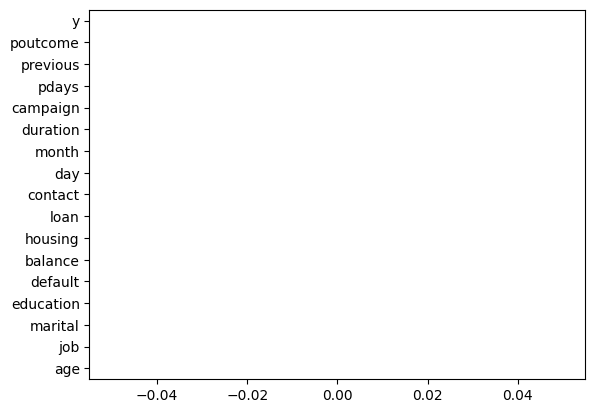

In [6]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the coloumn
df.isnull().sum().plot(kind = 'barh') # First Method

<Axes: >

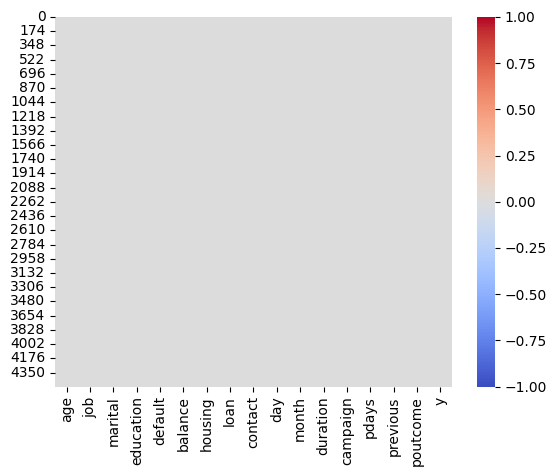

In [7]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the coloumn
sns.heatmap(df.isnull(),cmap='coolwarm',vmin=-1,vmax=1,center =0)
# Second Method

<Axes: >

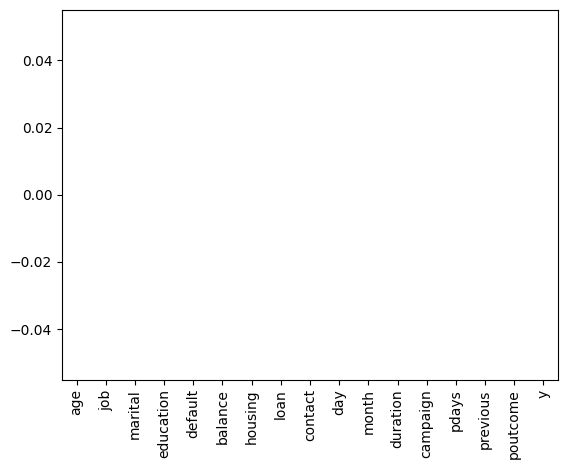

In [8]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the coloumn
df.isnull().sum().plot(kind = 'bar',cmap = 'viridis') # Third Method

In [9]:
# Split the Dataset Into Categorical and Numerical

categorical_col = df.select_dtypes(include ='object')
categorical_col

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [10]:
numerical_col = df.select_dtypes(exclude ='object')
numerical_col

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [11]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


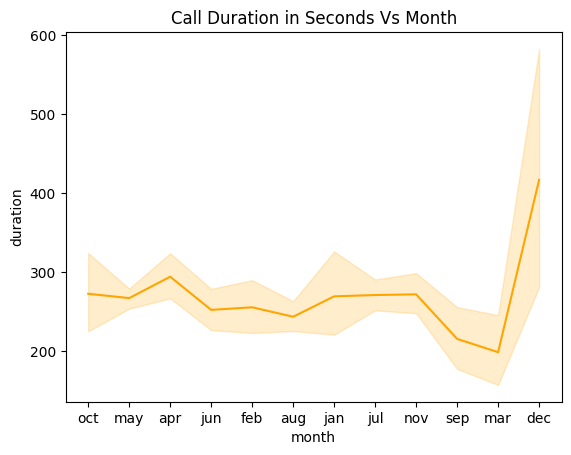

In [12]:
sns.lineplot(x =df['month'], y =df['duration'], c='orange')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

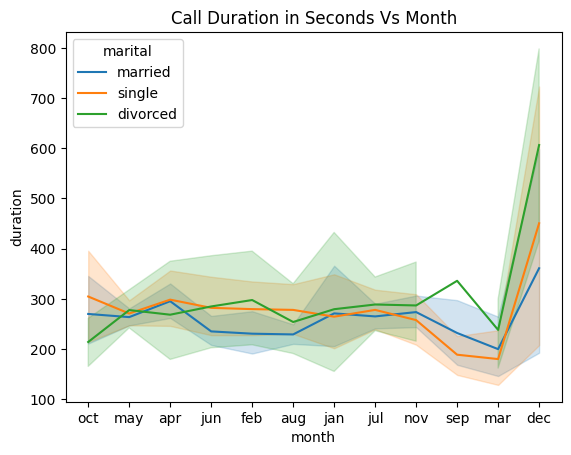

In [13]:
sns.lineplot(x =df['month'], y =df['duration'], c='orange',hue =df['marital'])
plt.title('Call Duration in Seconds Vs Month')
plt.show()

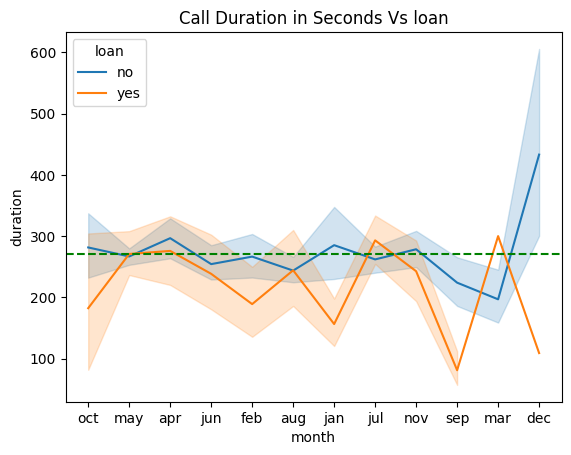

In [14]:
sns.lineplot(x =df['month'], y =df['duration'],hue =df['loan'])
plt.title('Call Duration in Seconds Vs loan')
plt.axhline(270,linestyle ='--', c='green')
plt.show()

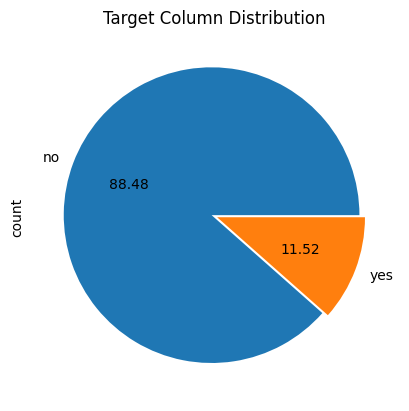

In [15]:
df['y'].value_counts().plot(kind ='pie',autopct = '%1.2f',explode =[0.02,0.02])
plt.title('Target Column Distribution')
plt.show()

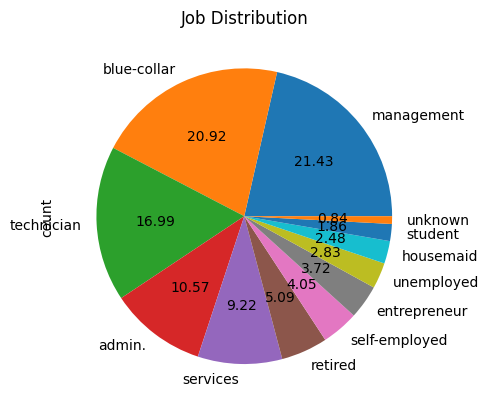

In [16]:
df['job'].value_counts().plot(kind ='pie',autopct = '%1.2f')
plt.title('Job Distribution')
plt.show()

In [17]:
management_job=df[(df['job'] == 'management') & (df['y'] == 'yes')]

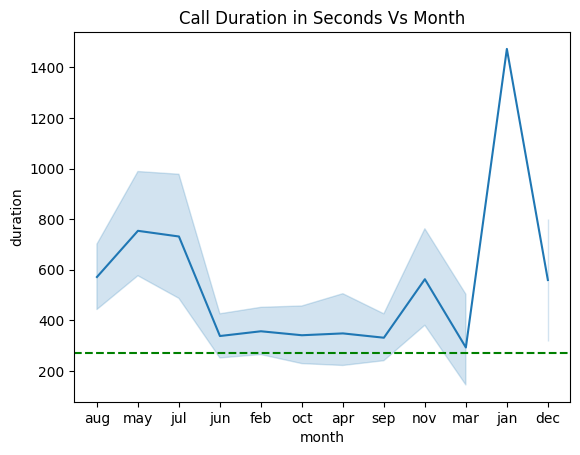

In [18]:
sns.lineplot(x =management_job['month'], y =management_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [19]:
bluecoller_job= df[(df['job'] == 'blue-collar') & (df['y'] == 'yes')]

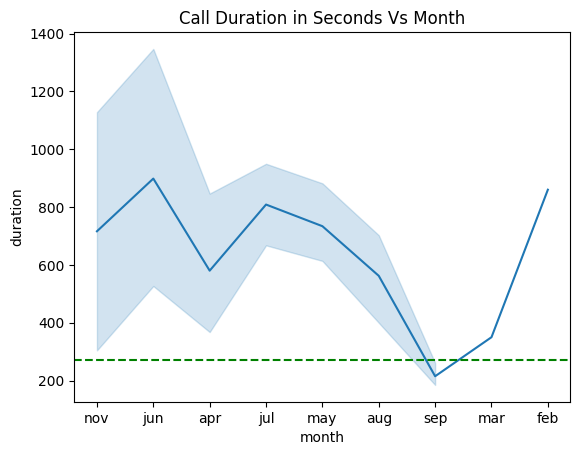

In [20]:
sns.lineplot(x =bluecoller_job['month'], y =bluecoller_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [21]:
technician_job= df[(df['job'] == 'technician') & (df['y'] == 'yes')]

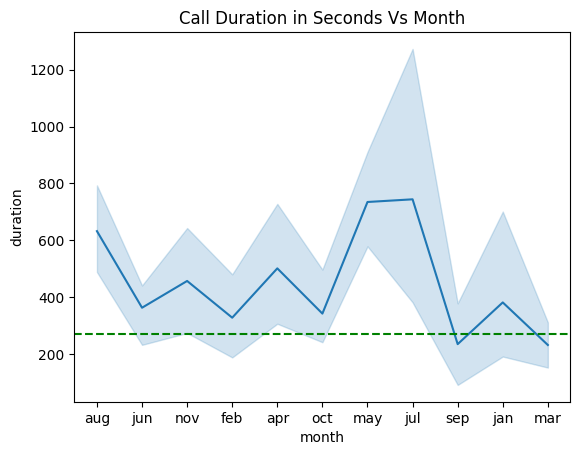

In [22]:
sns.lineplot(x =technician_job['month'], y =technician_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [23]:
admin_job= df[(df['job'] == 'admin') & (df['y'] == 'yes')]

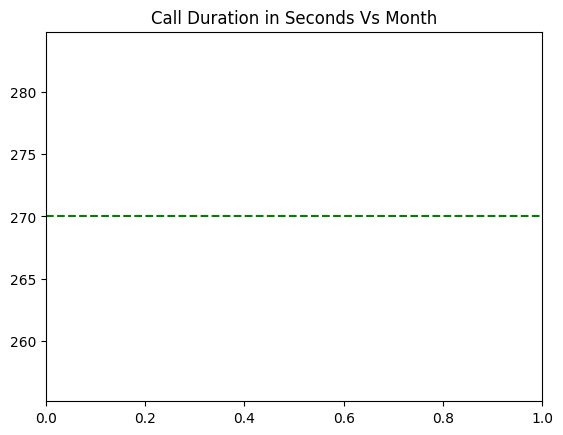

In [24]:
sns.lineplot(x =admin_job['month'], y =admin_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [25]:
services_job= df[(df['job'] == 'services') & (df['y'] == 'yes')]

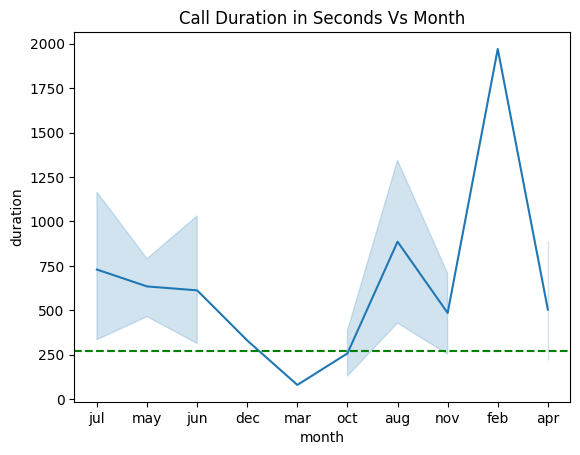

In [26]:
sns.lineplot(x =services_job['month'], y =services_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [27]:
df[df['job'] == 'admin.'].agg(['mode'])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode
0,34.0,admin.,married,secondary,no,0.0,yes,no,cellular,20.0,may,77,1.0,-1.0,0.0,unknown,no
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN


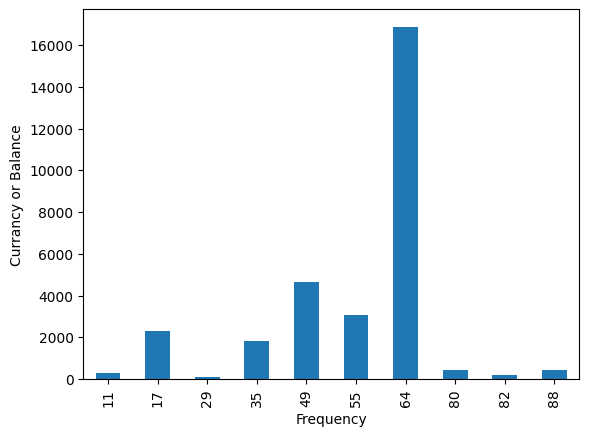

In [28]:
df[df['job'] == 'admin.'] ['balance'][:10].plot(kind = 'bar') # First Method
plt.xlabel('Frequency')
plt.ylabel('Currancy or Balance')
plt.show()

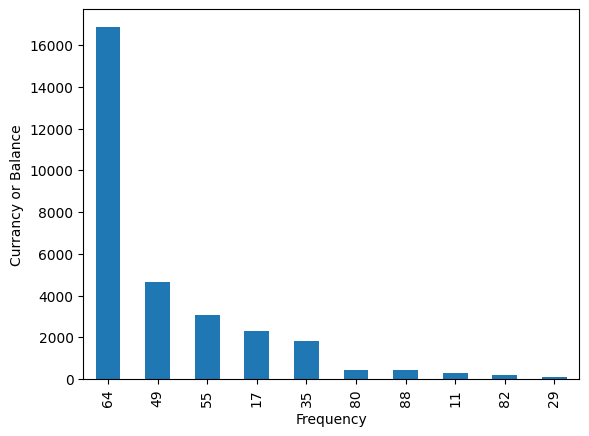

In [29]:
df[df['job'] == 'admin.'] ['balance'][:10].sort_values(ascending= False).plot(kind = 'bar') # Second Method
plt.xlabel('Frequency')
plt.ylabel('Currancy or Balance')
plt.show()

In [30]:
divorced=df[(df['marital'] == 'divorced') & (df['y'] == 'yes')]

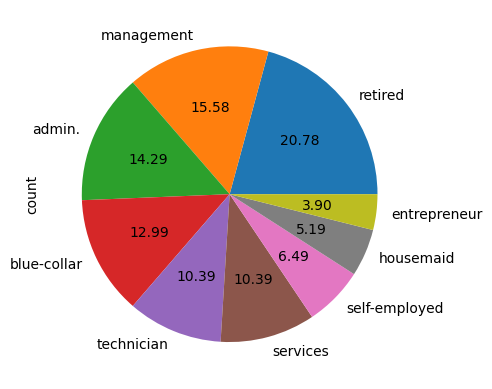

In [31]:
divorced['job'].value_counts().plot(kind ='pie',autopct = '%1.2f')

plt.show()

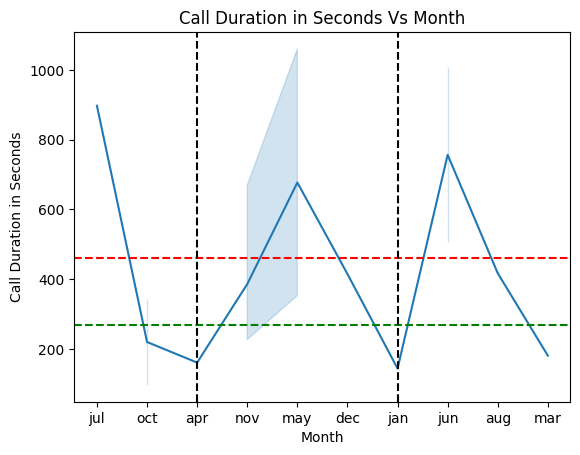

In [32]:
divorced_retired =divorced[divorced['job'] == 'retired']

sns.lineplot(x =divorced_retired['month'], y =divorced_retired['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.axhline(divorced_retired['duration'].mean(),linestyle ='--', c='red')
plt.xlabel('Month')
plt.ylabel('Call Duration in Seconds')
plt.axvline('apr',linestyle ='--', c='black')
plt.axvline('jan',linestyle ='--', c='black')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

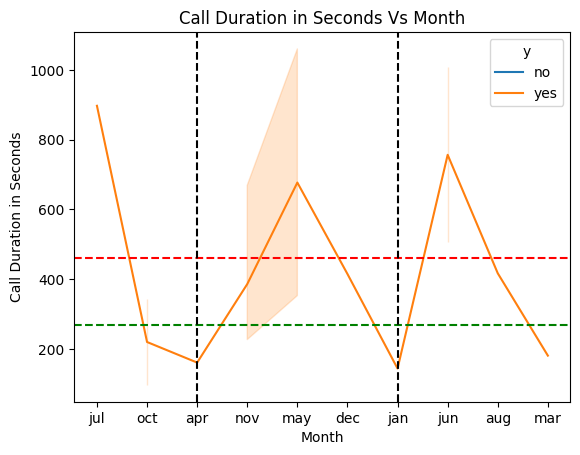

In [33]:
divorced_retired =divorced[divorced['job'] == 'retired']

sns.lineplot(x =divorced_retired['month'], y =divorced_retired['duration'],hue=df['y'])
plt.axhline(270,linestyle ='--', c='green')
plt.axhline(divorced_retired['duration'].mean(),linestyle ='--', c='red')
plt.xlabel('Month')
plt.ylabel('Call Duration in Seconds')
plt.axvline('apr',linestyle ='--', c='black')
plt.axvline('jan',linestyle ='--', c='black')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [34]:
divorced=df[(df['marital'] == 'divorced') & (df['y'] == 'no')]

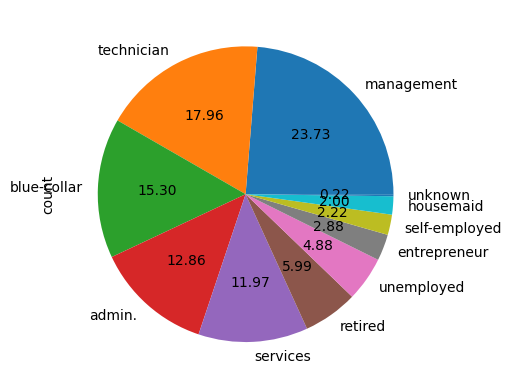

In [35]:
divorced['job'].value_counts().plot(kind ='pie',autopct = '%1.2f')

plt.show()

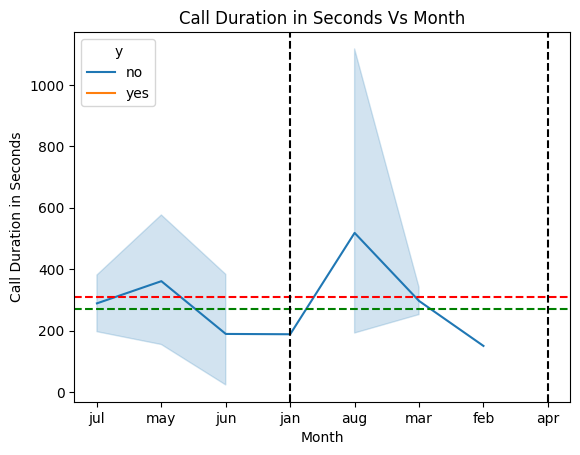

In [36]:
divorced_retired =divorced[divorced['job'] == 'retired']

sns.lineplot(x =divorced_retired['month'], y =divorced_retired['duration'],hue=df['y'])
plt.axhline(270,linestyle ='--', c='green')
plt.axhline(divorced_retired['duration'].mean(),linestyle ='--', c='red')
plt.xlabel('Month')
plt.ylabel('Call Duration in Seconds')
plt.axvline('apr',linestyle ='--', c='black')
plt.axvline('jan',linestyle ='--', c='black')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [37]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [38]:
# Univariate Analysis
'''
Step 1 : Create a Blank List
Step 2 : Create a Dictionary
Step 3 : Append list containing Dictionary key and value pair
Step 4 : Convert List into Dataframe

'''


'''
Note:
If any Column in Dataset shows IQR as zero such column must be dropped from the dataset.

IQR = Inter Quantile Range = Q3 - Q1

'''

from collections import OrderedDict
import pandas as pd

stats = []

for i in numerical_col.columns:
  numerical_stats = OrderedDict({
     'Feature': i,
      'Count':df[i].count(),
      'Minimum':df[i].min(),
      'Maximum':df[i].max(),
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
      'Standard Deviation':df[i].std(),
      'Kurtosis':df[i].kurt(),
      'Skewness':df[i].skew(),
      'Range':df[i].max()-df[i].min(),
      'Variance':df[i].var()


  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report


,Feature,Count,Minimum,Maximum,Mean,Median,Q1,Q3,IQR,Standard Deviation,Kurtosis,Skewness,Range,Variance
0,age,4521,19,87,41.170095,39.0,33.0,49.0,16.0,10.576211,0.348775,0.699501,68,1.118562e+02
1,balance,4521,-3313,71188,1422.657819,444.0,69.0,1480.0,1411.0,3009.638142,88.390332,6.596431,74501,9.057922e+06
2,day,4521,1,31,15.915284,16.0,9.0,21.0,12.0,8.247667,-1.039531,0.094627,30,6.802402e+01
3,duration,4521,4,3025,263.961292,185.0,104.0,329.0,225.0,259.856633,12.530050,2.772420,3021,6.752547e+04
4,campaign,4521,1,50,2.793630,2.0,1.0,3.0,2.0,3.109807,37.168920,4.743914,49,9.670897e+00
5,pdays,4521,-1,871,39.766645,-1.0,-1.0,-1.0,0.0,100.121124,7.957128,2.717071,872,1.002424e+04
6,previous,4521,0,25,0.542579,0.0,0.0,0.0,0.0,1.693562,51.995212,5.875259,25,2.868153e+00


In [39]:
# Encoding Technique
'''
Step 1 : Converting Categorical Columns to Numerical Columns
Step 2 : Use Label Encoder or One Hot Encoder

'''
# Create Copy of dataframe : df    # One Hot Encoder Method
data = df.copy()

data = pd.get_dummies(data,drop_first=True,dtype='int')
data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['job'] = le.fit_transform(df['job'])
df['job'].value_counts()

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,7,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,4,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,4,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,1,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,6,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,9,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,1,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [41]:
'''
Note:
1. All Independent columns are decoded or encoded using concept of Label encode or One hot encoder but target column must be encoded separetly using replace function or map function.
2. In the above dataset we find that 'y' is acts as target column where as other than 'y' column are termed as Independent columns
'''

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encoding all Categorical columns using Label Encoder: Indepedent columns
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])

# Encoding Target Column Separately
df['y'] = df['y'].replace({'yes':1,'no':0})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [42]:
df.drop(columns=['pdays','previous'],axis = 1,inplace= True)

In [43]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,1,0


In [44]:
df['y'].value_counts()

,count
y,
0,4000
1,521


In [62]:
# 1. Understand Scaling Technqiue
# 2. Data leackage and how to prevent the same (imp for interview purpose)
# 3. How to balance target column : Three Stratergies

'''
For Classifiaction / Recommendation Problem:

# Step 1 : Split the Dataset into X & y
           X : Independent Columns
           y : Dependent Columns / Target Column

# Step 2 : Use Train Test Split:
           Always Split the dataset into Seen and Unseen Data
           Seen Data : Train Data  : 70 % to 80 %
           Unseen Data : Test Data : 30 % to 20 %
           Test Size must be Between 0.20 to 0.30

# Step 3 : Try Balance the Target Column using imblearn Technique
           Imblearn Technqiues (scikit learn library):
           1. Oversampling Technique
           2. Undersampling Technique

# Step 4 : Using Scaling Technique:
           Mean != Meadian : Non Normal Distribution
           Mean = Median   : Normal Distribution

           Scaling Techniques:
           1. Standard Scaler : When the Dataset is Normal distributed
           2. Min Max Scaler : When the Dataset is Non Normal distributed
           3. Robust Scaler : When the dataset has more outliers and because of which the Machine Learning Model becomes more sensative.

'''
# Step 1 : Split the Dataset Into X and y
from sklearn.model_selection import train_test_split

# Independent Columns
X = df.drop(columns=['y'],axis = 1)
# Dependent Column
y = df['y']

# Step 2 : Use Train Test Split:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# Step 3 : Balance Technique : Undersampling Technique
from imblearn.under_sampling import ClusterCentroids,AllKNN
# Balance Technique : Oversampling Technique
from imblearn.over_sampling import RandomOverSampler,ADASYN,SMOTE

#sampling = ClusterCentroids()    # 1. Undersampling- ClusterCentroids

# y
# 0    369
# 1    369
# Name: count, dtype: int64 - O/p

#sampling = AllKNN()              # 2. Undersampling- AllKNN

# y
# 0    2068
# 1     369
# Name: count, dtype: int64 - o/p

#sampling = RandomOverSampler()  # 1. Oversampling- RandomOverSampler

# y
# 0    2795
# 1    2795
# Name: count, dtype: int64 - o/p

#sampling = ADASYN()               # 2. Oversampling- ADASYN

# y
# 0    2795
# 1    2781
# Name: count, dtype: int64 - o/p

sampling = SMOTE()               # 3. Oversampling- SMOTE

# y
# 0    2795
# 1    2795
# Name: count, dtype: int64 - o/p

X_train,y_train = sampling.fit_resample(X_train,y_train)

print(y_train.value_counts()) # print(y_train.value_counts())
                              # This show the Dataset balance

# Note :-
# 1) if your use Undersampling  Technique then most preferrable use first as ClusterCentroids() and second use as AllKNN()
# 2) if your use Oversampling Technique then most preferrable use first as SMOTE and second use as ()RandomOverSampler() and and third use as ADASYN()


y
0    2795
1    2795
Name: count, dtype: int64


In [63]:
# Step 4 : Using Scaling Technique:
'''
Note:
1. Always 'fit_transform' on Training Data Where as use 'tranform' on Test Data

# Seen Data
X_train = scalar.fit_transform(X_train)

# Unseen Data
X_test = scalar.transform(X_test)

'''
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# scalar = StandardScaler()
# scalar = RobustScaler()
scalar = MinMaxScaler()
# Seen Data
X_train = scalar.fit_transform(X_train)

# Unseen Data
X_test = scalar.transform(X_test)

# Checking
print(X_test.max(), X_test.min())


2.5058924583404916 -0.05383954646967875
